In [6]:
import pandas as pd
import numpy as np

In [7]:
customer_df=pd.read_csv('datasets/Customer.csv')
customer_df.sample(10)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
8389,True,F,26,Married,Other
19846,False,M,33,Married,Other
8112,False,F,36,Married,Other
186,False,F,31,Married,Retail
48610,False,F,45,Married,Sales
42950,False,M,22,Single,Student
14733,True,M,21,Single,Retail
16104,False,F,37,Unspecified,Professional
28946,False,M,33,Married,Executive
33594,False,F,31,Married,Other


This dataset tells us whether a customer has purchased a tent or not along with the customer details.

In [8]:
customer_df.shape

(60252, 5)

In [9]:
customer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,60252.0,34.187479,10.105477,17.0,26.0,33.0,41.0,69.0


In [10]:
import matplotlib.pyplot as plt

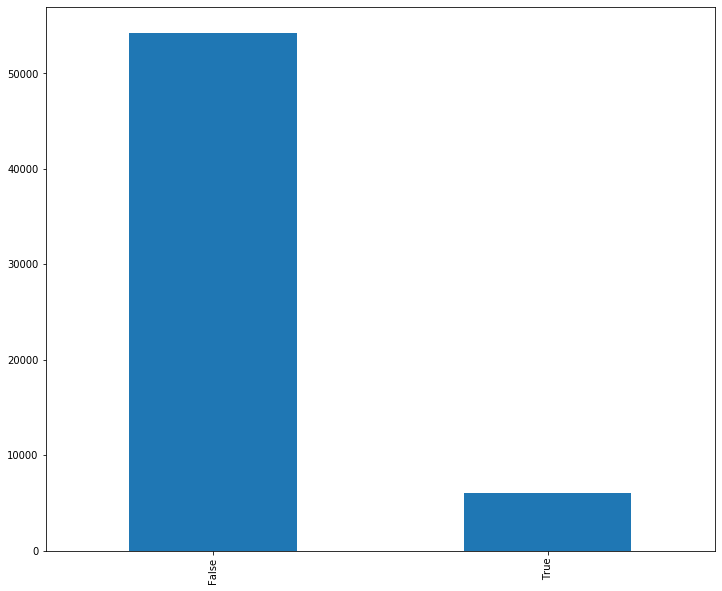

In [11]:
plt.figure(figsize=(12,10))
pd.value_counts(customer_df['IS_TENT']).plot.bar()

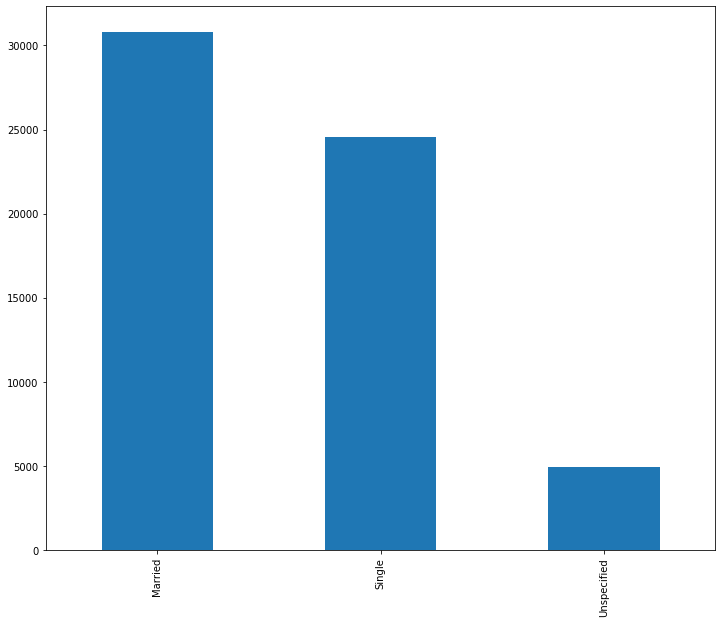

In [12]:
plt.figure(figsize=(12,10))
pd.value_counts(customer_df['MARITAL_STATUS']).plot.bar()

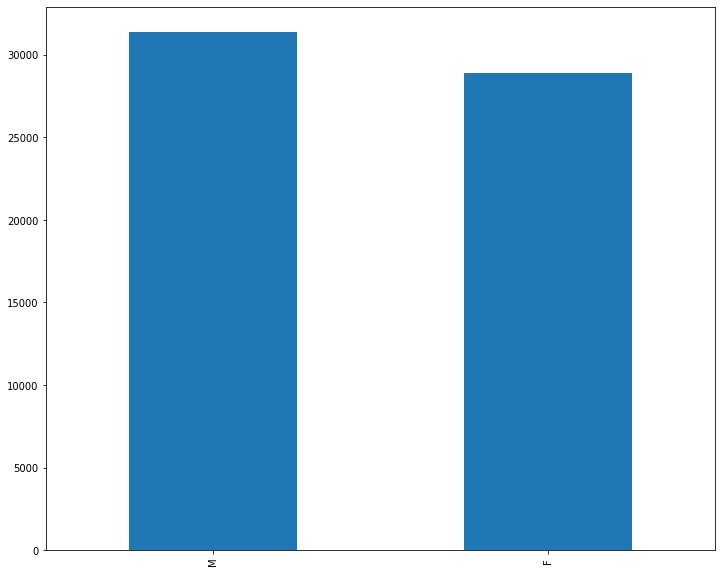

In [13]:
plt.figure(figsize=(12,10))
pd.value_counts(customer_df['GENDER']).plot.bar()

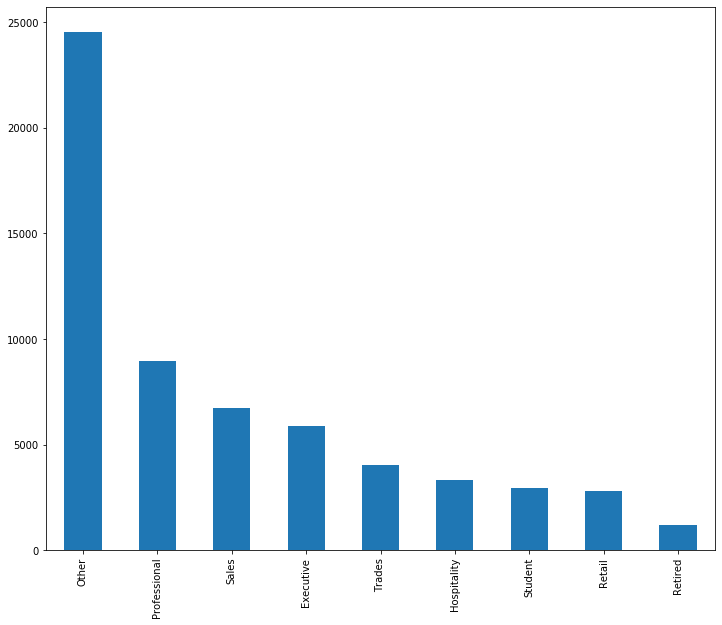

In [14]:
plt.figure(figsize=(12,10))
pd.value_counts(customer_df['PROFESSION']).plot.bar()

In [15]:
customer_df['GENDER'].unique()

array(['M', 'F'], dtype=object)

categorical features in the form of string are not understood by machine learning models hence we need to encode them with numerical values.
There are few ways of doing that here we will be talking about LabelEncoder and One hot Encoding.

## Things to remember before using Label Encoder.

1. For optimal solution dont use Label Encoder when category having more than two values in that case Scikit learn LabelEncoder will encode all category with incremental numeric then model will think that the feature has some ordinal relationship between values.


# Label Encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
gender=['M','F']

In [17]:
Label_Encoding=LabelEncoder()
Label_Encoding=Label_Encoding.fit(gender)

In [18]:
customer_df['GENDER']=Label_Encoding.transform(customer_df['GENDER'].astype(str))

In [19]:
customer_df.sample(12)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
30912,False,1,54,Married,Professional
52605,False,0,19,Single,Other
2057,False,0,47,Married,Hospitality
1674,False,1,30,Married,Sales
17487,False,1,20,Single,Professional
58665,True,1,38,Single,Executive
34863,False,1,44,Married,Other
47530,False,1,40,Married,Sales
9267,False,1,34,Single,Other
8914,False,1,22,Single,Retail


In [21]:
Label_Encoding.classes_

array(['F', 'M'], dtype='<U1')

In [21]:
customer_df['MARITAL_STATUS'].unique()

array(['Single', 'Married', 'Unspecified'], dtype=object)

In [22]:
Marital_status=['Single', 'Married', 'Unspecified']

When there is no implicit order in our features then we can gio for one-hot encoding.

# One-Hot Encoding:

In [23]:
from sklearn import preprocessing

In [24]:
One_Hot_Encoder = preprocessing.OneHotEncoder()
One_Hot_Encoder=One_Hot_Encoder.fit(customer_df['MARITAL_STATUS'].values.reshape(-1,1))

In [25]:
One_Hot_Encoder.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [26]:
one_hot_labels = One_Hot_Encoder.transform(customer_df['MARITAL_STATUS'].values.reshape(-1,1)).toarray()

In [29]:
Labels_df=pd.DataFrame()
Labels_df['MARITAL_STATUS_MARRIED']=one_hot_labels[:,0]
Labels_df['MARITAL_STATUS_SINGLE']=one_hot_labels[:,1]
Labels_df['MARITAL_STATUS_UNSPECIFIED']=one_hot_labels[:,2]
Labels_df.sample(5)

,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNSPECIFIED
26546,0.0,1.0,0.0
2891,0.0,1.0,0.0
49269,1.0,0.0,0.0
56616,1.0,0.0,0.0
28954,0.0,1.0,0.0


In [60]:
encoded_df=pd.concat([customer_df,Labels_df],axis=1)
encoded_df.drop('MARITAL_STATUS',axis=1,inplace=True)
encoded_df.sample(15)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNSPECIFIED
4235,True,0,46,Other,1.0,0.0,0.0
32625,False,1,44,Trades,1.0,0.0,0.0
9506,False,0,61,Other,1.0,0.0,0.0
21817,True,0,31,Other,1.0,0.0,0.0
47204,False,0,53,Retail,1.0,0.0,0.0
19126,False,1,54,Other,0.0,0.0,1.0
54194,False,1,28,Professional,0.0,1.0,0.0
50817,True,1,20,Other,0.0,1.0,0.0
28471,False,0,33,Other,1.0,0.0,0.0
2559,False,1,41,Other,0.0,0.0,1.0


This is just for better understanding , we can do this by just an one line code in pandas and pandas is intelligent enough to identify the categorical features and transform them. 